In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [42]:
# 1. Load the built‑in Iris dataset
iris = load_iris(as_frame=True)
X = iris.data                      
y = iris.target                    
class_names = iris.target_names 

In [44]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [46]:
#feature scaling—trees
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [48]:
#training a decision tree 
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
#making a prediction
y_pred = dt_model.predict(X_test_scaled)

In [52]:
#evaluating on the test set
acc = accuracy_score(y_test, y_pred)
print(f"Decision‑Tree accuracy (Iris): {acc:.2f}")

Decision‑Tree accuracy (Iris): 0.89


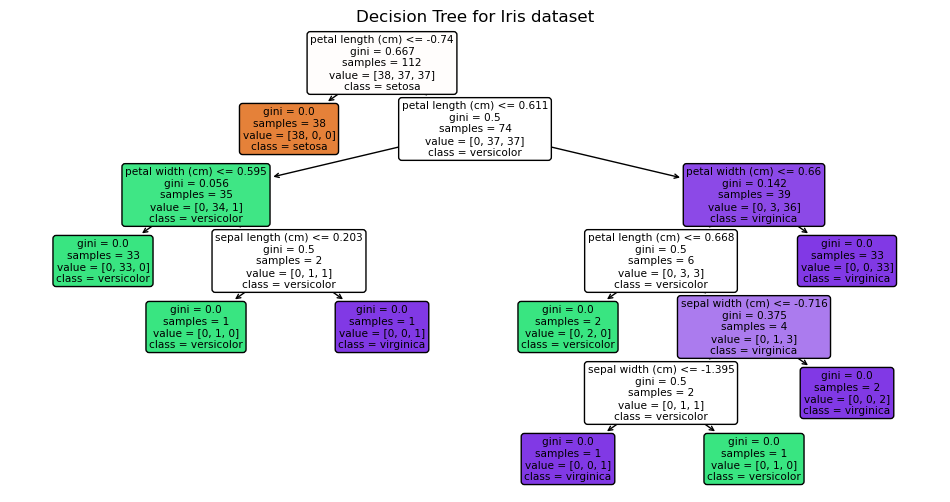

In [54]:
#plotting the tree
plt.figure(figsize=(12,6))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree for Iris dataset")
plt.show()